In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
import pandas as pd
import seaborn as sn

#--------------------------------------------------------------------------------
# correspondance data CH
data1 = [
    [6,26,114,36,3,2126,23,11,251,73,244,15],
    [344,677,2220,1401,150,40165,994,280,3491,3670,7039,556],
    [752,1116,1729,2253,252,39941,1486,476,4200,4721,5638,1029],
    [163,128,249,554,51,10405,311,81,570,1465,888,126],
    [155,135,211,497,65,5583,298,63,452,989,553,127],
    [62,36,90,147,24,1709,111,21,131,306,195,52],
    [196,96,169,675,110,9302,380,106,344,2010,437,84],
    [10,15,31,50,1,990,18,7,90,86,95,23]
    ]

labels11 = ['AUC','OBL','PRO','MAT','PRS','EPS','UNI','AUT']
labels12 = ['Bel','Che','Cri','Epa','Jou','Lau','Mon','Pau','Pri','Pul','Ren','Rom'] 

#--------------------------------------------------------------------------------
# correspondance data F-bac
data2 = [
    [9724,5650,8679,9432,839,3353,5355,83],
    [924,464,567,984,132,423,736,12],
    [1081,490,830,1222,118,410,743,13],
    [1135,587,686,904,83,629,813,13],
    [1482,667,1020,1535,173,629,989,26],
    [1033,509,553,1063,100,433,742,13],
    [1272,527,861,1116,219,769,1232,13],
    [2549,1141,2164,2752,587,1660,1951,41],
    [1828,681,1364,1741,302,1289,1683,15],
    [1076,443,880,1121,145,917,1091,15],
    [827,333,481,892,137,451,618,18],
    [2213,809,1439,2623,269,990,1783,14],
    [2158,1271,1633,2352,350,950,1509,22],
    [1358,503,639,1377,164,495,959,10],
    [2757,873,1466,2296,215,789,1459,17],
    [2493,1120,1494,2329,254,855,1565,28],
    [551,297,386,663,67,334,378,12],
    [3951,2127,3218,4743,545,2072,3018,36],
    [1066,579,724,1239,126,476,649,12],
    [1844,816,1154,1839,156,469,993,16],
    [3944,1645,2415,3616,343,1236,2404,22],
    [327,31,85,178,9,27,79,0]
    ]
labels21 = ['IDF','CHA','PIC','HNO','CEN','BNO','BOU','NPC','LOR','ALS','FCO','PDL','BRE','PCH','AQU','MPY','LIM','RHA','AUV','LRO','PCA','COR']
labels22 = ['A','B','C','D','E','F','G','H'] 

#--------------------------------------------------------------------------------

df1 = pd.DataFrame(data1, labels11, labels12)
df2 = pd.DataFrame(data2, labels21, labels22)

class CA(object):
    """Simple corresondence analysis.

    Inputs
    ------
    ct : array_like
      Two-way contingency table. If `ct` is a pandas DataFrame object,
      the index and column values are used for plotting.
    Notes
    -----
    The implementation follows that presented in 'Correspondence
    Analysis in R, with Two- and Three-dimensional Graphics: The ca
    Package,' Journal of Statistical Software, May 2007, Volume 20,
    Issue 3.
    -----
    Author: Taro Sato on May 7, 2014
    Modified by: Denis Ullmann on October 9, 2020
    """

    def __init__(self, ct):
        self._ct =  ct
        self.rows = ct.index.values if hasattr(ct, 'index') else None
        self.cols = ct.columns.values if hasattr(ct, 'columns') else None

        # contingency table
        N = np.matrix(ct, dtype=float)

        # correspondence matrix from contingency table
        P = N / N.sum()

        # row and column marginal totals of P as vectors
        r = P.sum(axis=1)
        c = P.sum(axis=0).T

        # diagonal matrices of row/column sums
        D_r_rsq = np.diag(1. / np.sqrt(r.A1))
        D_c_rsq = np.diag(1. / np.sqrt(c.A1))

        # the matrix of standarized residuals
        S = D_r_rsq * (P - r * c.T) * D_c_rsq

        # compute the SVD
        U, D_a, V = svd(S, full_matrices=False)
        D_a = np.asmatrix(np.diag(D_a))
        V = V.T

        # principal coordinates of rows
        F = D_r_rsq * U * D_a

        # principal coordinates of columns
        G = D_c_rsq * V * D_a

        # standard coordinates of rows
        X = D_r_rsq * U

        # standard coordinates of columns
        Y = D_c_rsq * V

        # the total variance of the data matrix
        inertia = sum([(P[i,j] - r[i,0] * c[j,0])**2 / (r[i,0] * c[j,0])
                       for i in range(N.shape[0])
                       for j in range(N.shape[1])])

        self.F = F.A
        self.G = G.A
        self.X = X.A
        self.Y = Y.A
        self.inertia = inertia
        self.eigenvals = np.diag(D_a)**2

    def plot(self, rows = 'r', cols = 'b'):
        """Plot the first and second dimensions.
        rows : the color to use for row profiles (not shown when when None)
        cols : the color to use for cols profiles (not shown when when None)
        """
        xmin, xmax = None, None
        ymin, ymax = None, None
        if rows:
            if self.rows is not None:
                for i, t in enumerate(self.rows):
                    x, y = self.F[i,0], self.F[i,1]
                    plt.text(x, y, t, va='center', ha='center', color=rows)
                    xmin = min(x, xmin if xmin else x)
                    xmax = max(x, xmax if xmax else x)
                    ymin = min(y, ymin if ymin else y)
                    ymax = max(y, ymax if ymax else y)
            else:
                plt.plot(self.F[:, 0], self.F[:, 1], rows + 'o')

        if cols:
            if self.cols is not None:
                for i, t in enumerate(self.cols):
                    x, y = self.G[i,0], self.G[i,1]
                    plt.text(x, y, t, va='center', ha='center', color=cols)
                    xmin = min(x, xmin if xmin else x)
                    xmax = max(x, xmax if xmax else x)
                    ymin = min(y, ymin if ymin else y)
                    ymax = max(y, ymax if ymax else y)
            else:
                plt.plot(self.G[:, 0], self.G[:, 1], cols + 's')

        if xmin and xmax:
            pad = (xmax - xmin) * 0.1
            plt.xlim(xmin - pad, xmax + pad)
        if ymin and ymax:
            pad = (ymax - ymin) * 0.1
            plt.ylim(ymin - pad, ymax + pad)

        plt.grid()
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')

    def scree_diagram(self, perc=True, *args, **kwargs):
        """Plot the scree diagram."""
        eigenvals = self.eigenvals
        xs = np.arange(1, eigenvals.size + 1, 1)
        ys = 100. * eigenvals / eigenvals.sum() if perc else eigenvals
        plt.plot(xs, ys, *args, **kwargs)
        plt.xlabel('Dimension')
        plt.ylabel('Eigenvalue' + (' [%]' if perc else ''))


     Bel   Che   Cri   Epa  Jou    Lau   Mon  Pau   Pri   Pul   Ren   Rom
AUC    6    26   114    36    3   2126    23   11   251    73   244    15
OBL  344   677  2220  1401  150  40165   994  280  3491  3670  7039   556
PRO  752  1116  1729  2253  252  39941  1486  476  4200  4721  5638  1029
MAT  163   128   249   554   51  10405   311   81   570  1465   888   126
PRS  155   135   211   497   65   5583   298   63   452   989   553   127


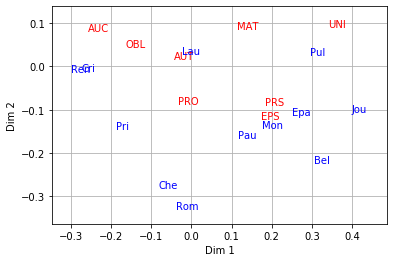

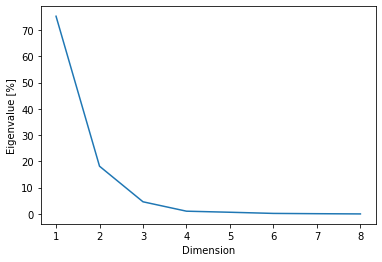

        A     B     C     D    E     F     G   H
IDF  9724  5650  8679  9432  839  3353  5355  83
CHA   924   464   567   984  132   423   736  12
PIC  1081   490   830  1222  118   410   743  13
HNO  1135   587   686   904   83   629   813  13
CEN  1482   667  1020  1535  173   629   989  26


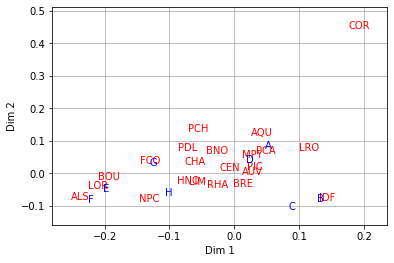

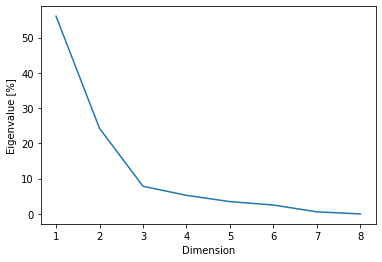

In [2]:
def fca_infos(df):
    #print(df.describe())
    print(df.head())

    ca = CA(df)

    plt.figure(100)
    ca.plot()
    #ca.plot(cols=None) -> on n'a plus les columns profile

    plt.figure(101)
    ca.scree_diagram()

    plt.show()

for df in [df1, df2]:
    fca_infos(df)

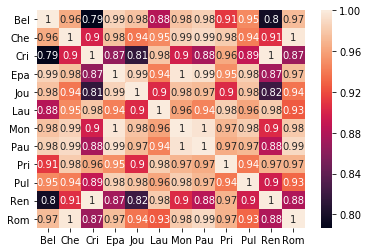

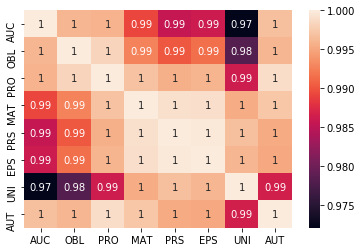

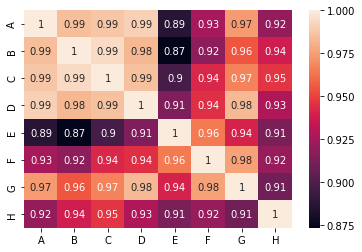

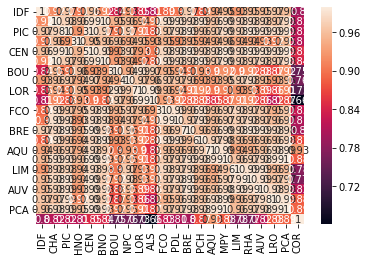

In [3]:
matCor_df1_col=df1.corr()
#print(matCor_df1_col)
matCor_df1_raw=np.transpose(df1).corr()
#print(matCor_df1_raw)


matCor_df2_col=df2.corr()
matCor_df2_raw=np.transpose(df2).corr()

sn.heatmap(matCor_df1_col, annot=True)
plt.show()

sn.heatmap(matCor_df1_raw, annot=True)
plt.show()
sn.heatmap(matCor_df2_col, annot=True)
plt.show()

sn.heatmap(matCor_df2_raw, annot=True)
plt.show()

In [4]:
df2['B']['IDF']
'''
comment on correlation
Quand la couleur est proche de 1, cela veut dire que les deux valeurs sont fortement corrélées, ie si une des deux valeurs augmente l'autre a beaucoup de chance d'augmenter aussi.
Si le coefficient de correlation vaut 0, cela signifie que les variables aléatoires sont indépendantes d'un point de vue statisique.
On observe ainsi que les valeurs sont assez fortement corrélées entre elles.

'''

"\ncomment on correlation\nQuand la couleur est proche de 1, cela veut dire que les deux valeurs sont fortement corrélées, ie si une des deux valeurs augmente l'autre a beaucoup de chance d'augmenter aussi.\nSi le coefficient de correlation vaut 0, cela signifie que les variables aléatoires sont indépendantes d'un point de vue statisique.\nOn observe ainsi que les valeurs sont assez fortement corrélées entre elles.\n\n"

     Bel   Che   Cri   Epa  Jou    Lau   Mon  Pau   Pri   Pul   Ren   Rom
OBL  344   677  2220  1401  150  40165   994  280  3491  3670  7039   556
PRO  752  1116  1729  2253  252  39941  1486  476  4200  4721  5638  1029
MAT  163   128   249   554   51  10405   311   81   570  1465   888   126
PRS  155   135   211   497   65   5583   298   63   452   989   553   127
EPS   62    36    90   147   24   1709   111   21   131   306   195    52


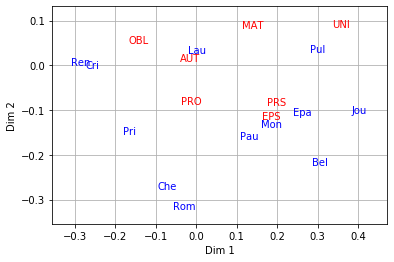

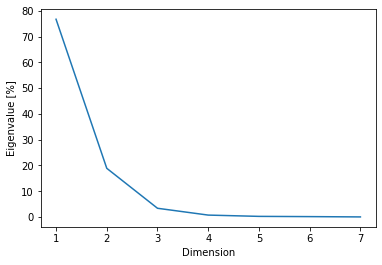

     Bel   Che   Cri   Epa  Jou    Lau   Mon  Pau   Pri   Pul   Ren   Rom
AUC    6    26   114    36    3   2126    23   11   251    73   244    15
PRO  752  1116  1729  2253  252  39941  1486  476  4200  4721  5638  1029
MAT  163   128   249   554   51  10405   311   81   570  1465   888   126
PRS  155   135   211   497   65   5583   298   63   452   989   553   127
EPS   62    36    90   147   24   1709   111   21   131   306   195    52


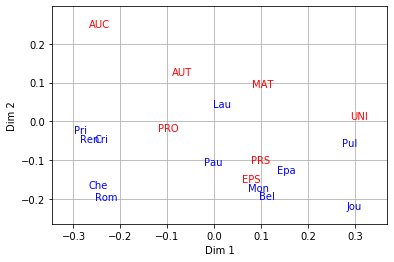

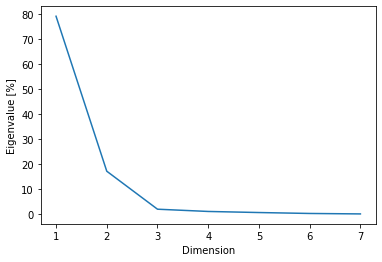

     Bel  Che   Cri   Epa  Jou    Lau  Mon  Pau   Pri   Pul   Ren  Rom
AUC    6   26   114    36    3   2126   23   11   251    73   244   15
OBL  344  677  2220  1401  150  40165  994  280  3491  3670  7039  556
MAT  163  128   249   554   51  10405  311   81   570  1465   888  126
PRS  155  135   211   497   65   5583  298   63   452   989   553  127
EPS   62   36    90   147   24   1709  111   21   131   306   195   52


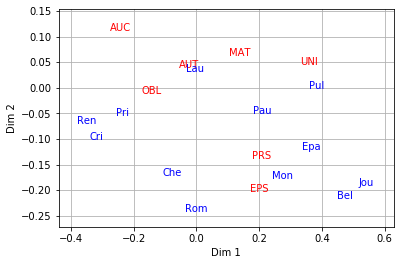

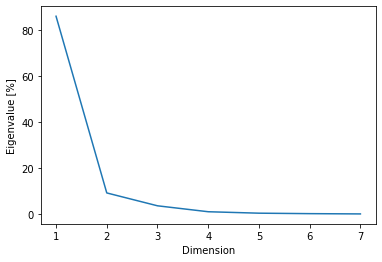

     Bel   Che   Cri   Epa  Jou    Lau   Mon  Pau   Pri   Pul   Ren   Rom
AUC    6    26   114    36    3   2126    23   11   251    73   244    15
OBL  344   677  2220  1401  150  40165   994  280  3491  3670  7039   556
PRO  752  1116  1729  2253  252  39941  1486  476  4200  4721  5638  1029
PRS  155   135   211   497   65   5583   298   63   452   989   553   127
EPS   62    36    90   147   24   1709   111   21   131   306   195    52


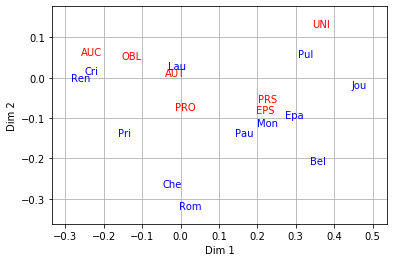

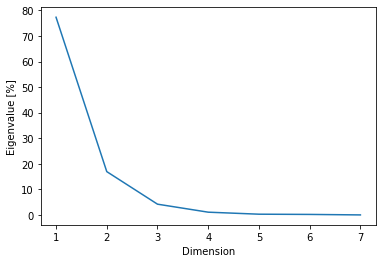

     Bel   Che   Cri   Epa  Jou    Lau   Mon  Pau   Pri   Pul   Ren   Rom
AUC    6    26   114    36    3   2126    23   11   251    73   244    15
OBL  344   677  2220  1401  150  40165   994  280  3491  3670  7039   556
PRO  752  1116  1729  2253  252  39941  1486  476  4200  4721  5638  1029
MAT  163   128   249   554   51  10405   311   81   570  1465   888   126
EPS   62    36    90   147   24   1709   111   21   131   306   195    52


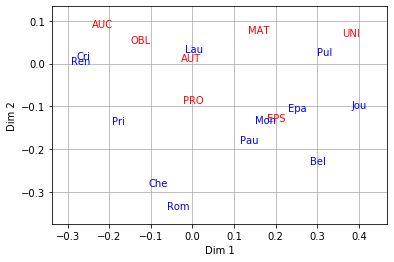

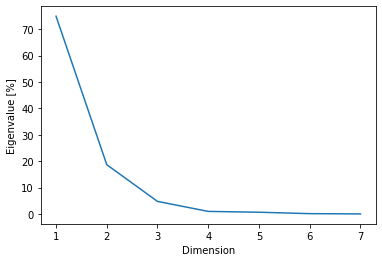

     Bel   Che   Cri   Epa  Jou    Lau   Mon  Pau   Pri   Pul   Ren   Rom
AUC    6    26   114    36    3   2126    23   11   251    73   244    15
OBL  344   677  2220  1401  150  40165   994  280  3491  3670  7039   556
PRO  752  1116  1729  2253  252  39941  1486  476  4200  4721  5638  1029
MAT  163   128   249   554   51  10405   311   81   570  1465   888   126
PRS  155   135   211   497   65   5583   298   63   452   989   553   127


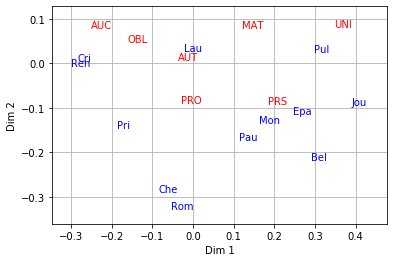

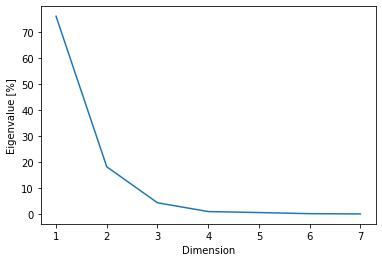

     Bel   Che   Cri   Epa  Jou    Lau   Mon  Pau   Pri   Pul   Ren   Rom
AUC    6    26   114    36    3   2126    23   11   251    73   244    15
OBL  344   677  2220  1401  150  40165   994  280  3491  3670  7039   556
PRO  752  1116  1729  2253  252  39941  1486  476  4200  4721  5638  1029
MAT  163   128   249   554   51  10405   311   81   570  1465   888   126
PRS  155   135   211   497   65   5583   298   63   452   989   553   127


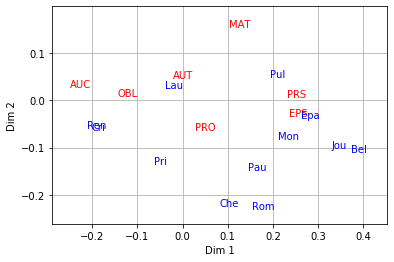

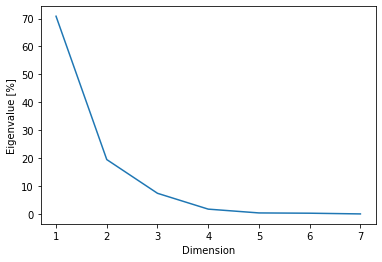

     Bel   Che   Cri   Epa  Jou    Lau   Mon  Pau   Pri   Pul   Ren   Rom
AUC    6    26   114    36    3   2126    23   11   251    73   244    15
OBL  344   677  2220  1401  150  40165   994  280  3491  3670  7039   556
PRO  752  1116  1729  2253  252  39941  1486  476  4200  4721  5638  1029
MAT  163   128   249   554   51  10405   311   81   570  1465   888   126
PRS  155   135   211   497   65   5583   298   63   452   989   553   127


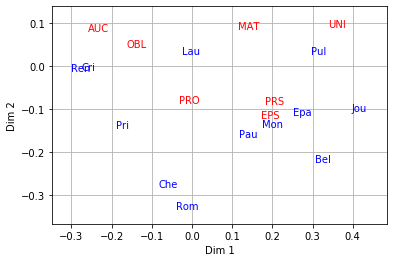

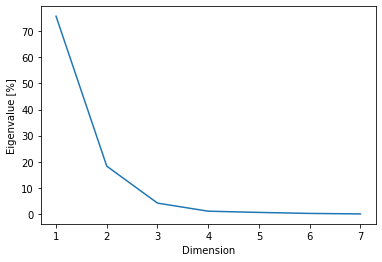

In [5]:
cdf=[]
for i in labels11:
    cdf.append(df1.drop(i, axis=0))
    
for i in cdf:
    fca_infos(i)

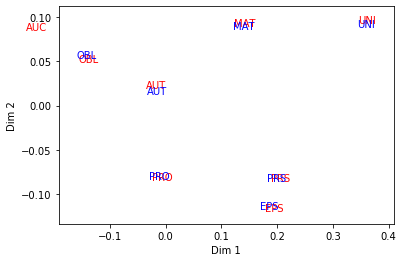

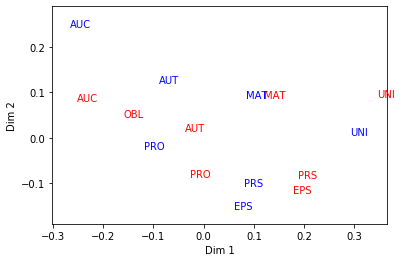

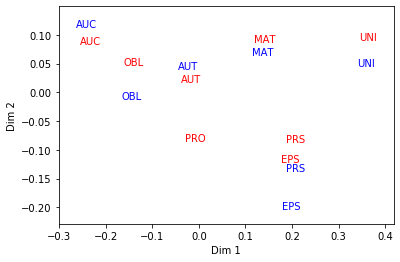

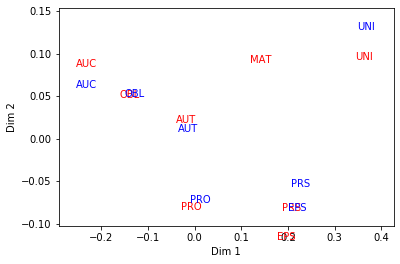

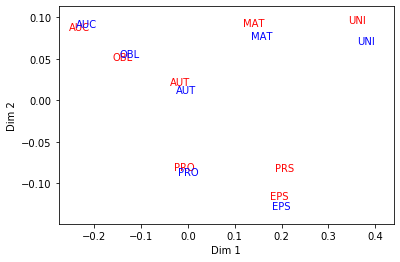

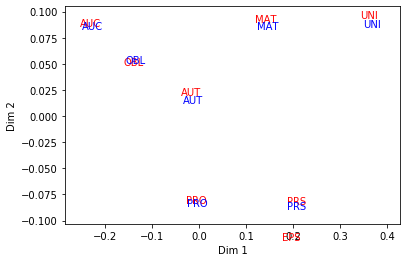

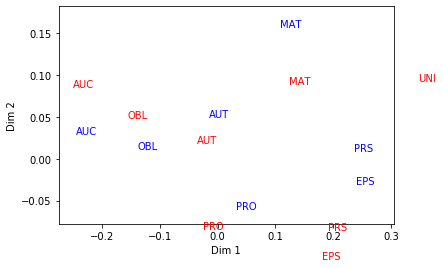

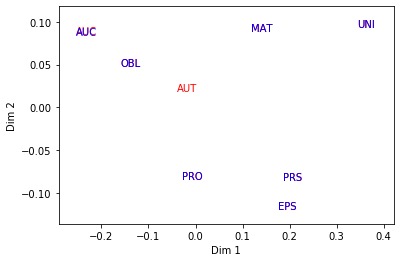

In [6]:
def fca_infos2(df,dfb):
    #print(df.describe())
    #print(df.head())

    ca = CA(df)

    plt.figure(100)
    ca.plot(cols=None)
    CA(dfb).plot(cols=None, rows='b')
    #ca.plot(cols=None) -> on n'a plus les columns profile

    #plt.figure(101)
    #ca.scree_diagram()
    plt.show()
    



#cdf1=df1.copy()
#cdf1.drop(df.index[1])
#fca_infos2(cdf1,cdf[0])



cdf=[]
for i in labels11:
    cdf.append(df1.drop(i, axis=0))


for i in cdf:
    fca_infos2(df1,i)
    

In [7]:
cdf[7]
#ie on peut enlever AUT et avoir très peu de différence, car très corelées avec les autres données

,Bel,Che,Cri,Epa,Jou,Lau,Mon,Pau,Pri,Pul,Ren,Rom
AUC,6,26,114,36,3,2126,23,11,251,73,244,15
OBL,344,677,2220,1401,150,40165,994,280,3491,3670,7039,556
PRO,752,1116,1729,2253,252,39941,1486,476,4200,4721,5638,1029
MAT,163,128,249,554,51,10405,311,81,570,1465,888,126
PRS,155,135,211,497,65,5583,298,63,452,989,553,127
EPS,62,36,90,147,24,1709,111,21,131,306,195,52
UNI,196,96,169,675,110,9302,380,106,344,2010,437,84


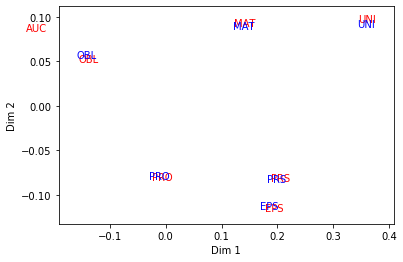

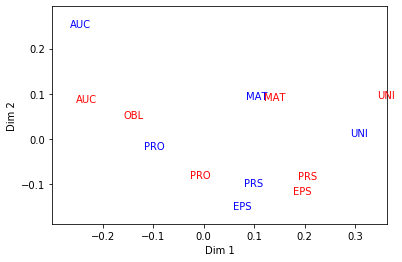

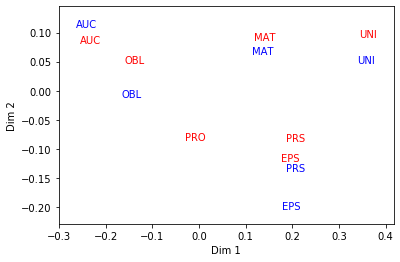

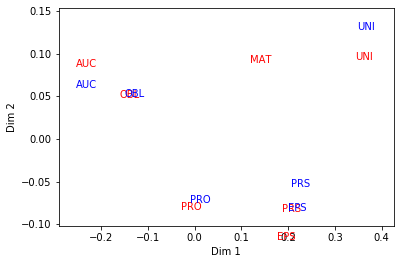

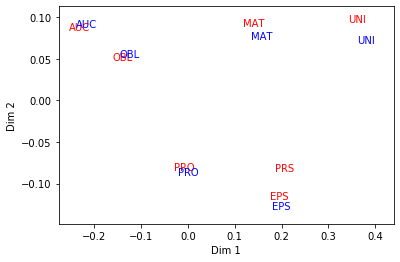

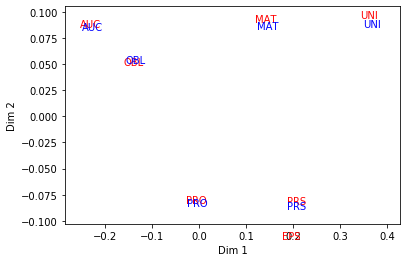

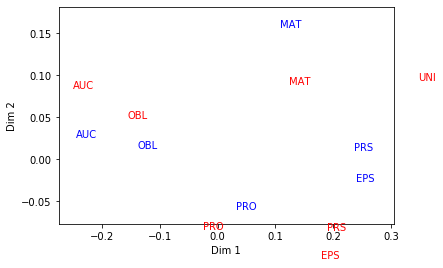

In [8]:
cdf2=[]
for i in labels11[:-1]: #enlève AUT
    cdf2.append(cdf[7].drop(i, axis=0))
    
for i in cdf2:
    fca_infos2(cdf[7],i)

In [9]:
l1=labels11[:-1]
l2=l1[1:]
print(l2)
#AUC était le plus proche, on l'enlève

['OBL', 'PRO', 'MAT', 'PRS', 'EPS', 'UNI']


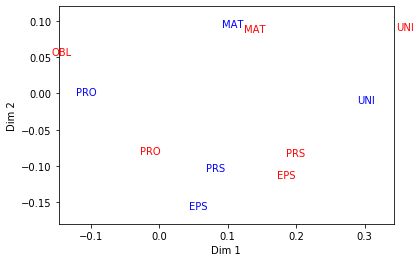

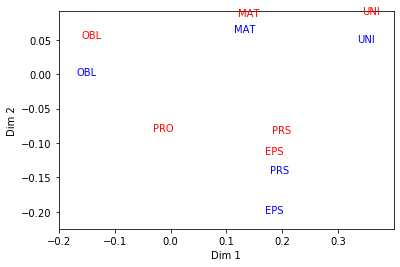

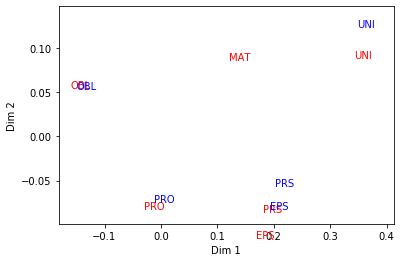

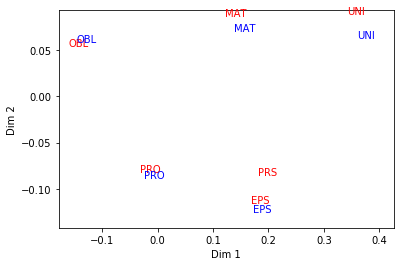

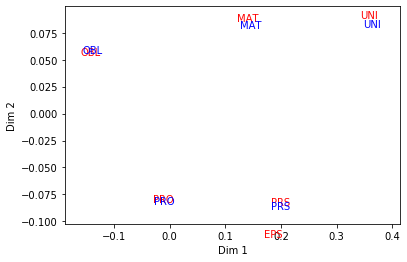

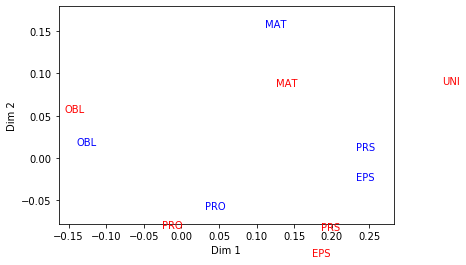

In [10]:
cdf3=[]
for i in l2: 
    cdf3.append(cdf2[0].drop(i, axis=0))
    
for i in cdf3:
    fca_infos2(cdf2[0],i)
    
#On peut enlever EPS, c'est celui qui est le plus proche